In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
u_cols = ['user id', 'age', 'sex', 'occupation', 'zip code']
r_cols = ['user id', 'movie_id', 'rating', 'timestamp']
m_cols = ['movie_id', 'title', 'year', 'video_release_date', 'imdb url']

In [3]:
users=pd.read_csv("u.user",sep='|',names=u_cols)
ratings = pd.read_csv('u.data',sep='\t', names=r_cols)
movies = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(5),encoding="437")
movielens=pd.merge(users,ratings)
movielens=pd.merge(movielens,movies)

movielens.year=movielens.year.str[7:]


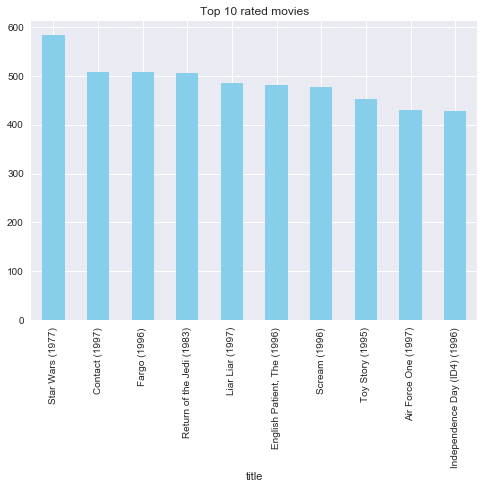

In [4]:
most_rated=movielens.groupby('title').size().sort_values(ascending=False)[:10]
most_rated.plot(kind="bar",title="Top 10 rated movies",label="count",facecolor='skyblue')
plt.show()

In [5]:
movielens.describe()

,user id,age,movie_id,rating,timestamp,video_release_date
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,0.0
mean,462.48475,32.969850,425.530130,3.529860,8.835289e+08,NaN
std,266.61442,11.562623,330.798356,1.125674,5.343856e+06,NaN
min,1.00000,7.000000,1.000000,1.000000,8.747247e+08,NaN
25%,254.00000,24.000000,175.000000,3.000000,8.794487e+08,NaN
50%,447.00000,30.000000,322.000000,4.000000,8.828269e+08,NaN
75%,682.00000,40.000000,631.000000,4.000000,8.882600e+08,NaN
max,943.00000,73.000000,1682.000000,5.000000,8.932866e+08,NaN


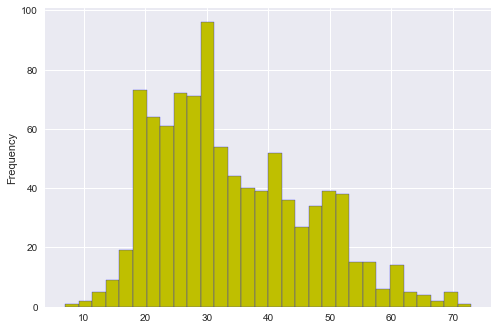

In [6]:
users.age.plot.hist(bins=30,edgecolor='b',color='y')
plt.xlabel=("Age")
plt.ylabel=("count")
plt.title=("Age distribution")
plt.show()

In [7]:
movie_stat = movielens.groupby('title').agg({'rating':[np.size,np.mean]})
movie_stat.sort_values([('rating','mean')],ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

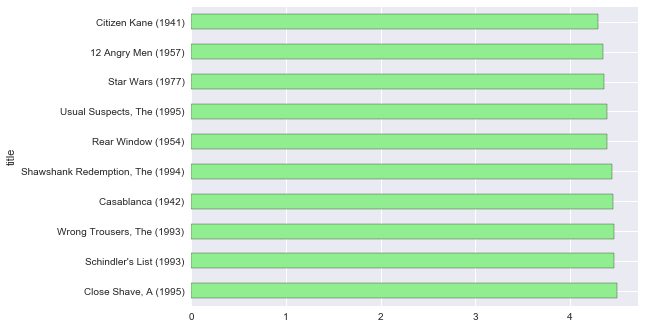

In [8]:
most100=movie_stat['rating']['size'] >= 100
most_rated_mean=movie_stat[most100].sort_values([('rating', 'mean')], ascending=False)
most_rated_mean['rating']['mean'].sort_values(ascending=False)[:10].plot(kind="barh",facecolor='lightgreen',edgecolor='black')
plt.show()

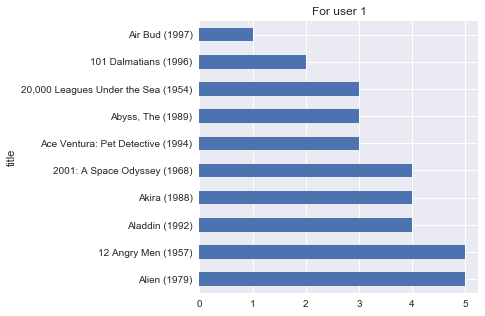

In [9]:
user1=movielens[movielens['user id']==1]
user1=user1.groupby('title').agg([np.size,np.mean])
user1['rating']['mean'][:10].sort_values(ascending=False).plot(kind="barh",figsize=(5,5),title="For user 1",label="Movie Name")
plt.show()

In [10]:
movielens.reset_index(inplace=True)
pivoted = movielens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [11]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [12]:
pivoted.reset_index('movie_id', inplace=True)

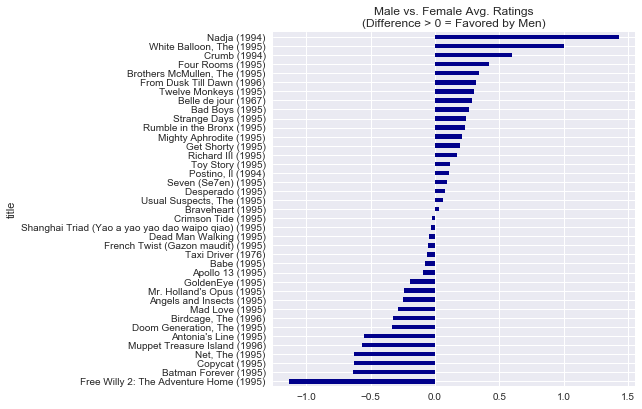

In [17]:
disagreements = pivoted[pivoted.movie_id.isin(movielens.head(40).index)]['diff']
disagreements.sort_values().plot(facecolor='darkblue',kind='barh', figsize=[6.5, 6.5],title=("Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)"))
plt.show()